In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Waters and Lange calibratin datat

In [3]:
help(pt.return_cali_dataset)

Help on function return_cali_dataset in module Thermobar.calibration_plots:

return_cali_dataset(model=None)
    This function returns the calibration dataset for different models, often with mineral components returned.
    This allows you to make your own plots rather than using the generic_cali_plot() option.
    
    
    Parameters
    -------
    
    
    model: str
        AMPHIBOLE:
        Ridolfi2021:  Ridolfi et al. (2021)
        Putirka2016:  Putirka (2016)
        Mutch2016: Mutch et al. (2016)
        Zhang2017: Zhang et al. (2017)
    
        CPX:
        Putirka2008: Putirka (2008) - entire database for Cpx-Liq,
        (not used for all equations).
        Masotta2013: Masotta et al. (2013)
        Neave2017:  Neave and Putirka (2017) for Cpx-Liq
        Brugman2019: Brugman and Till 2019
        Petrelli2020:  Petrelli et al. (2020) for Cpx and Cpx-Liq
        Wang2021: Wang et al. (2021) Cpx-only,but contains Liq compositions too.
        Jorgenson2022: Jorgenson 

In [4]:
Cali=pt.return_cali_dataset(model="Waters2015")
Cali
CalcWL_cali=pt.calculate_fspar_liq_hygr(XAn=Cali['XAn'], XAb=Cali['XAb'], T=pd.Series(Cali['T\n(°C)']+0.00001+273.15),
                                        liq_comps=Cali, equationH="H_Waters2015", P=Cali['P\n(bars)']/1000)

CalcWL_cali_eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=Cali, XAn=Cali['XAn'], XAb=Cali['XAb'],
                                        P=Cali['P_kbar'], T=Cali['T_K'])


Masotta2019_Cali=pt.return_cali_dataset(model="Masotta2019")
Masotta2019_eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=Masotta2019_Cali, XAn=Masotta2019_Cali['XAn'], 
                                                    XAb=Masotta2019_Cali['XAb'],
 P=Masotta2019_Cali['P_kbar'], T=Masotta2019_Cali['T_K'])

In [5]:
liq_comps=Masotta2019_Cali
plag_comps=Masotta2019_Cali
cat_liqs = pt.calculate_anhydrous_cat_fractions_liquid(liq_comps)

cat_plags = pt.calculate_cat_fractions_plagioclase(plag_comps=plag_comps)
combo_plag_liq = pd.concat([cat_plags, cat_liqs], axis=1)

In [6]:
combo_plag_liq['An_Plag']

0     0.336423
1     0.372458
2     0.400935
3     0.351528
4     0.545068
5     0.549688
6     0.471840
7     0.516239
8     0.367778
9     0.521522
10    0.493381
11    0.731925
12    0.395601
13    0.371381
14    0.580793
15    0.482857
16    0.644184
17    0.734029
18    0.507186
Name: An_Plag, dtype: float64

In [7]:
Masotta2019_Cali['P_kbar']

0     1.50
1     1.50
2     1.50
3     1.50
4     1.50
5     1.50
6     1.50
7     1.50
8     2.00
9     2.02
10    2.02
11    1.95
12    2.00
13    2.00
14    2.02
15    2.02
16    1.70
17    1.70
18    2.02
Name: P_kbar, dtype: float64

In [8]:
Cali

,Sample I.D.,XAn,XAb,T\n(°C),P\n(bars),Viscosity\n(log10 Pa s),SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,H2O_Liq,Total,Source,T_K,P_kbar
0,#41,0.877000,0.123000,1050,2020,1.247965,51.13,0.98,18.17,8.62,6.03,12.19,2.43,0.07,4.783592,94.10,Berndt et al. (2005),1323.15,2.020
1,#191,0.854000,0.146000,980,2000,1.802203,48.44,2.15,17.05,11.20,3.58,8.61,3.10,0.43,4.938681,95.80,Botcharnikov et al. (2008),1253.15,2.000
2,Puy 10,0.356378,0.620372,925,500,4.161184,70.50,0.62,14.40,3.23,0.52,1.88,5.69,2.86,2.531912,98.80,Castro et al. (2013),1198.15,0.500
3,Puy 15,0.371932,0.605580,875,750,4.442126,72.40,0.47,14.40,2.36,0.33,1.41,5.29,3.04,3.294989,98.00,Castro et al. (2013),1148.15,0.750
4,Puy 17,0.368093,0.610986,825,1500,4.354234,72.80,0.29,14.80,1.75,0.26,1.49,5.42,2.96,4.994418,93.80,Castro et al. (2013),1098.15,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Yang et al. (1996)-67-032-110,0.718398,0.276915,1171,1,3.116715,50.40,2.10,13.50,11.70,7.05,11.50,2.66,0.17,0.000000,99.08,Yang et al. (1996),1444.15,0.001
210,Yang et al. (1996)-62-002-110,0.677989,0.316119,1160,1,3.259137,50.40,2.27,13.30,11.90,6.71,11.20,2.73,0.19,0.000000,98.70,Yang et al. (1996),1433.15,0.001
211,Yang et al. (1996)-RE-46-9,0.901895,0.098105,1225,1,2.475783,50.00,0.55,15.20,8.52,10.10,14.10,1.14,0.01,0.000000,99.62,Yang et al. (1996),1498.15,0.001
212,Yang et al. (1996)-RE-46-14,0.876533,0.123467,1207,1,2.637833,50.10,0.58,14.80,9.17,9.43,14.10,1.42,0.02,0.000000,99.62,Yang et al. (1996),1480.15,0.001


In [9]:
Cali

,Sample I.D.,XAn,XAb,T\n(°C),P\n(bars),Viscosity\n(log10 Pa s),SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,H2O_Liq,Total,Source,T_K,P_kbar
0,#41,0.877000,0.123000,1050,2020,1.247965,51.13,0.98,18.17,8.62,6.03,12.19,2.43,0.07,4.783592,94.10,Berndt et al. (2005),1323.15,2.020
1,#191,0.854000,0.146000,980,2000,1.802203,48.44,2.15,17.05,11.20,3.58,8.61,3.10,0.43,4.938681,95.80,Botcharnikov et al. (2008),1253.15,2.000
2,Puy 10,0.356378,0.620372,925,500,4.161184,70.50,0.62,14.40,3.23,0.52,1.88,5.69,2.86,2.531912,98.80,Castro et al. (2013),1198.15,0.500
3,Puy 15,0.371932,0.605580,875,750,4.442126,72.40,0.47,14.40,2.36,0.33,1.41,5.29,3.04,3.294989,98.00,Castro et al. (2013),1148.15,0.750
4,Puy 17,0.368093,0.610986,825,1500,4.354234,72.80,0.29,14.80,1.75,0.26,1.49,5.42,2.96,4.994418,93.80,Castro et al. (2013),1098.15,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Yang et al. (1996)-67-032-110,0.718398,0.276915,1171,1,3.116715,50.40,2.10,13.50,11.70,7.05,11.50,2.66,0.17,0.000000,99.08,Yang et al. (1996),1444.15,0.001
210,Yang et al. (1996)-62-002-110,0.677989,0.316119,1160,1,3.259137,50.40,2.27,13.30,11.90,6.71,11.20,2.73,0.19,0.000000,98.70,Yang et al. (1996),1433.15,0.001
211,Yang et al. (1996)-RE-46-9,0.901895,0.098105,1225,1,2.475783,50.00,0.55,15.20,8.52,10.10,14.10,1.14,0.01,0.000000,99.62,Yang et al. (1996),1498.15,0.001
212,Yang et al. (1996)-RE-46-14,0.876533,0.123467,1207,1,2.637833,50.10,0.58,14.80,9.17,9.43,14.10,1.42,0.02,0.000000,99.62,Yang et al. (1996),1480.15,0.001


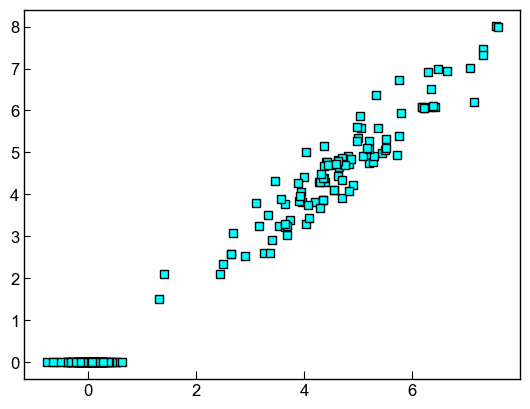

In [10]:
plt.plot(CalcWL_cali['H2O_calc'], Cali['H2O_Liq'], 'sk', mfc='cyan')

In [11]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Plag-Liq')
myPlags1=out['Plags']
myLiquids1=out['Liqs']
Plag_Glass=out['my_input']
notinLEPR= Plag_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
InWaters=((Plag_Glass['Citation_x'].str.contains('Berndt2005_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Rader2013_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Rader2013_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Parmon2011_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Costa2004_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Waters2020_notinLEPR'))
)
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Plag_Glass['P_kbar_x']<20
mask_1GPa=mask_1GPa.fillna(False)



Eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=myLiquids1, plag_comps=myPlags1, 
                                        P=Plag_Glass['P_kbar_x'], T=Plag_Glass['T_K_x'])

#Filt=Press_new&Eq_Mask

C:\Users\penny\AppData\Local\Temp\ipykernel_15288\1067556472.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


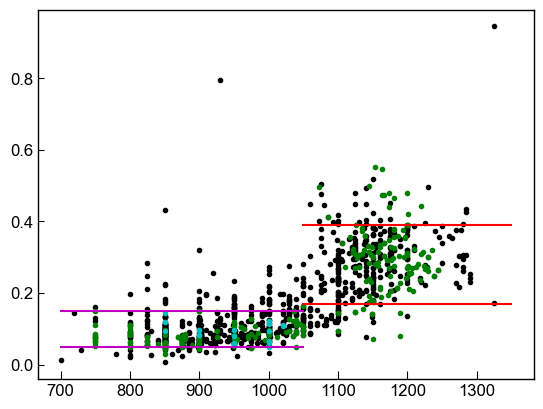

In [12]:
# Keith says Obs_Kd_An_Ab between 0.05 and 0.15 at low T (<1050 C ) is in equilibrum
# If T>1050 C, between 0.17 and 0.39
plt.plot(Plag_Glass['T_K_x']-273.15, Eq_tests['Obs_Kd_Ab_An'], '.k')
plt.plot(Cali['T_K']-273.15, CalcWL_cali_eq_tests['Obs_Kd_Ab_An'], '.g')
plt.plot(Masotta2019_Cali['T_K']-273.15, Masotta2019_eq_tests['Obs_Kd_Ab_An'], '.c')



plt.plot([700, 1050], [0.05, 0.05], '-m')
plt.plot([700, 1050], [0.15, 0.15], '-m')
plt.plot([1050, 1350], [0.17, 0.17], '-r')
plt.plot([1050, 1350], [0.39, 0.39], '-r')

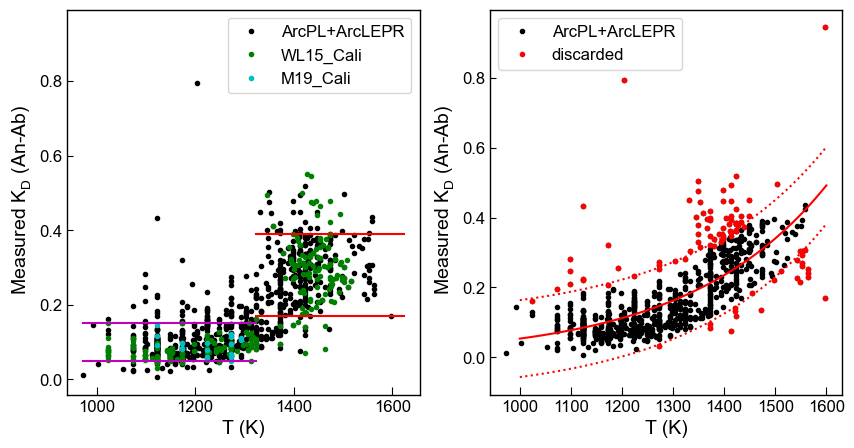

In [43]:
x_reg=pd.concat([Plag_Glass['T_K_x'], Cali['T_K'], Masotta2019_Cali['T_K']], axis=0)
y_reg=pd.concat([Eq_tests['Obs_Kd_Ab_An'], CalcWL_cali_eq_tests['Obs_Kd_Ab_An'], 
                 Masotta2019_eq_tests['Obs_Kd_Ab_An']], axis=0)
x_reg2=x_reg[(y_reg>0)&(x_reg>0)&(y_reg<0.6)]
y_reg2=y_reg[(y_reg>0)&(x_reg>0)&(y_reg<0.6)]
from scipy.optimize import curve_fit

# Assuming x_reg2 and y_reg2 are your variables

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Provide the initial guess for the parameters
initial_guess = [0.0009, 0.004]

# Fit the exponential function to the data
popt, pcov = curve_fit(exponential_func, x_reg2, y_reg2, p0=initial_guess)

# Get the optimized parameters
a_opt, b_opt = popt


# Generate the predicted values using the optimized parameters
xlin=np.linspace(1000, 1600, 100)
y_predicted = exponential_func(x_reg2, a_opt, b_opt)
y_predicted2 = exponential_func(xlin, a_opt, b_opt)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Plag_Glass['T_K_x'], Eq_tests['Obs_Kd_Ab_An'], '.k', label='ArcPL+ArcLEPR')
ax1.plot(Cali['T_K'], CalcWL_cali_eq_tests['Obs_Kd_Ab_An'], '.g', label='WL15_Cali')
ax1.plot(Masotta2019_Cali['T_K'], Masotta2019_eq_tests['Obs_Kd_Ab_An'], '.c', label='M19_Cali')
ax1.legend()



ax1.plot([700+273.15, 1050+273.15], [0.05, 0.05], '-m')
ax1.plot([700+273.15, 1050+273.15], [0.15, 0.15], '-m')
ax1.plot([1050+273.15, 1350+273.15], [0.17, 0.17], '-r')
ax1.plot([1050+273.15, 1350+273.15], [0.39, 0.39], '-r')
ax1.set_xlabel('T (K)')
ax2.set_xlabel('T (K)')
ax1.set_ylabel(' Measured K$_D$ (An-Ab)')
ax2.set_ylabel(' Measured K$_D$ (An-Ab)')
# Plot the actual data and the predicted curve
ax2.plot(Plag_Glass['T_K_x'], Eq_tests['Obs_Kd_Ab_An'], '.k', label='ArcPL+ArcLEPR')
ax2.plot(xlin, y_predicted2, '-r')
ax2.plot(xlin, y_predicted2+0.1, ':r')
ax2.plot(xlin, y_predicted2-0.1, ':r')
too_far=np.abs(Eq_tests['Obs_Kd_Ab_An']-exponential_func(Plag_Glass['T_K_x'], a_opt, b_opt))>0.1
ax2.plot(Plag_Glass['T_K_x'].loc[too_far],
         Eq_tests['Obs_Kd_Ab_An'].loc[too_far],
         '.r',label='discarded')
# ax2.plot([700+273.15, 1050+273.15], [0.05, 0.05], '-m')
# ax2.plot([700+273.15, 1050+273.15], [0.15, 0.15], '-m')

ax2.legend()
fig.savefig('Supplement_Plag_KDValues.png', dpi=200)


# Keith suggests best equilibrium test is Observed Kd (Ab-An)
Press_new=mask_1GPa&newMask&(~InWaters)&(~too_far)
Press_new=Press_new.fillna(False)


xT=Plag_Glass['T_K_x'].loc[Press_new]
xH=Plag_Glass['H2O_Liq'].loc[Press_new]

x=Plag_Glass['P_kbar_x'].loc[Press_new]

np.savetxt('parameters.txt', [a_opt, b_opt])



In [14]:
sum(mask_1GPa&newMask&(~InWaters)&(~too_far))

410

## sorting by water amounts

In [15]:
Test_input_All=out['my_input']
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Test_input_All['H2O_Liq']>0
Quantmethod=(VBD_cal_mask|Sol_mask|FTIR_mask|SIMS_mask|Raman_mask)&nonzero
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)



In [16]:
sum(Quantmethod1&nonzero)

163

In [17]:
sum(Quantmethod&nonzero)

358

In [18]:
100*sum(VBD_cal_mask&Press_new)/sum(Press_new)

16.829268292682926

In [19]:
100*sum(FTIR_mask&Press_new)/sum(Press_new)

32.19512195121951

In [20]:
100*sum(Raman_mask&Press_new)/sum(Press_new)

4.878048780487805

In [21]:
100*sum(Sol_mask&Press_new)/sum(Press_new)

18.048780487804876

In [22]:
100*sum(SIMS_mask&Press_new)/sum(Press_new)

5.609756097560975

In [23]:
sum(Sol_mask&Press_new)

74

In [24]:
sum(VBD_cal_mask&Press_new)

69

In [25]:
sum(Quantmethod&Press_new)-sum(VBD_cal_mask&Press_new)

211

In [26]:
100*sum(Quantmethod&Press_new)/sum(Press_new)

68.29268292682927

In [27]:
Test_input_All['Citation_x'].loc[Sol_mask].unique()

array(['Kraw2013_notinLEPR', 'Mandler2013_notinLEPR',
       'Costa2004_notinLEPR', 'Andujar2015_notinLEPR',
       'Waters2020_notinLEPR', 'Marxer2022_notinLEPR',
       'Nakatani2022_notinLEPR', 'Solaro2019_notinLEPR'], dtype=object)

## How many do different measurement techniques

In [28]:
total_len=sum(Press_new)
print('Truly quantiative methods')
print(sum(Quantmethod1&Press_new)/total_len)
print('New ones doing FTIR')
print(sum(FTIR_mask&Press_new)/total_len)
print('New ones doing SIMS')
print(sum(SIMS_mask&Press_new)/total_len)
print('New ones doing Raman')
print(sum(Raman_mask&Press_new)/total_len)
print('Ones using solubility models')
print(sum(Sol_mask&Press_new)/total_len)
print('VBD method calibrated')
print(sum(VBD_cal_mask&Press_new)/total_len)
print('VBD method not calibrated')
print(sum(VBD_mask&Press_new)/total_len-sum(VBD_cal_mask&Press_new)/total_len)



Truly quantiative methods
0.4268292682926829
New ones doing FTIR
0.32195121951219513
New ones doing SIMS
0.05609756097560976
New ones doing Raman
0.04878048780487805
Ones using solubility models
0.18048780487804877
VBD method calibrated
0.16829268292682928
VBD method not calibrated
0.21707317073170732


## If we known temperature

In [29]:
Calc_Global=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  T=Plag_Glass['T_K_x'],
                                       P=Plag_Glass['P_kbar_x'])

## IF we have to iterate temperature

In [30]:
Calc_Global_It=pt.calculate_fspar_liq_temp_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  equationT="T_Put2008_eq24a",
                                       P=Plag_Glass['P_kbar_x'])
Iter_TH_T=Calc_Global_It['T_H_calc']

20


## Lets get waters calibration dataset. 

In [31]:
WL=pt.return_cali_dataset(model="Waters2015")

In [32]:
len(WL['H2O_Liq'].loc[WL['H2O_Liq']==0])/len(WL)

0.5

In [33]:
H2O_knownT=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        T=Plag_Glass['T_K_x'], equationH="H_Waters2015", P=Plag_Glass['P_kbar_x'])

In [34]:
H2O_knownT

,H2O_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,6.251553,Low T: No,0.364842,0.107888,0.018968,0.861324,0.376661,0.000002,0.432419,55.599998,0.03,26.400000,0.39,0.02,0.03,9.660000,5.21,0.31,0.0,0,0.925367,0.000744,0.005428,0.172262,0.517845,0.168122,0.006582,0.000282,0.000376,0.0,1.797007,0.514949,0.000414,0.003021,0.095860,0.288171,0.093557,0.003663,0.000157,0.000209,0.0,0.496481,0.484549,0.018970,74.510249,0.260446,15.513531,2.196807,0.101914,0.294417,3.736836,1.143698,2.242102,0.0,0.000000,6.5,0.0,0.0,0.0,0.0,0,0.803317,0.004732,0.000931,0.019807,0.043167,0.098562,0.011954,0.015419,0.002112,0.000000,0.0,0.713467,0.004203,0.000827,0.017592,0.038339,0.175076,0.021233,0.027389,0.001876,0.000000,0.0,0.192830,0.192830,12.0,1123.15
1,6.200423,Low T: No,0.229802,0.202191,0.014072,0.856646,0.156860,0.000032,0.157044,52.299999,0.08,29.400000,0.35,0.01,0.07,12.700000,4.02,0.24,0.0,1,0.870444,0.001737,0.004872,0.226473,0.576691,0.129722,0.005096,0.000141,0.001002,0.0,1.816176,0.479273,0.000956,0.002682,0.124698,0.317530,0.071426,0.002806,0.000078,0.000551,0.0,0.626845,0.359051,0.014104,66.601795,0.540599,17.731647,3.524705,0.064872,0.886582,5.265434,3.330090,2.054276,0.0,0.000000,11.0,0.0,0.0,0.0,0.0,1,0.724231,0.014372,0.000597,0.032053,0.061348,0.113623,0.035105,0.014249,0.004422,0.000000,0.0,0.622739,0.012358,0.000514,0.027561,0.052751,0.195401,0.060370,0.024504,0.003802,0.000000,0.0,0.309568,0.309568,12.0,1173.15
2,8.012052,Low T: Yes,0.153404,0.068072,0.011556,0.619270,0.283821,0.000020,0.086739,49.400002,0.06,31.799999,0.74,0.02,0.08,15.100000,2.33,0.19,0.0,2,0.822178,0.001985,0.010300,0.269271,0.623768,0.075187,0.004034,0.000282,0.000751,0.0,1.807756,0.454806,0.001098,0.005698,0.148953,0.345051,0.041591,0.002232,0.000156,0.000416,0.0,0.772675,0.215749,0.011576,67.314132,0.334896,18.419290,2.578701,0.066979,0.602813,5.603929,3.215004,1.864255,0.0,0.000000,7.6,0.0,0.0,0.0,0.0,2,0.732931,0.009785,0.000618,0.023481,0.065377,0.118183,0.033936,0.012948,0.002743,0.000000,0.0,0.629089,0.008398,0.000530,0.020154,0.056114,0.202878,0.058255,0.022226,0.002354,0.000000,0.0,0.294133,0.294133,12.0,1123.15
3,6.790874,Low T: Yes,0.323905,0.030638,0.007141,1.190718,0.095390,0.000018,0.060670,47.400002,0.05,33.900002,0.40,0.03,0.09,17.299999,1.39,0.12,0.0,3,0.788892,0.002233,0.005567,0.308502,0.664960,0.044854,0.002548,0.000423,0.000626,0.0,1.818605,0.433789,0.001228,0.003061,0.169637,0.365643,0.024664,0.001401,0.000233,0.000344,0.0,0.866813,0.126028,0.007159,65.831765,0.509808,18.064944,4.011969,0.177325,1.108279,5.951457,2.549041,1.795412,0.0,0.000000,12.3,0.0,0.0,0.0,0.0,3,0.715475,0.017956,0.001632,0.036465,0.069304,0.115697,0.026857,0.012447,0.004168,0.000000,0.0,0.619459,0.015547,0.001413,0.031571,0.060003,0.200341,0.046505,0.021553,0.003608,0.000000,0.0,0.329944,0.329944,8.0,1173.15
4,7.510793,Low T: Yes,0.514144,0.103999,0.007561,1.335771,0.0668

In [35]:
# Pass An-Ab Eq Test Put2008?

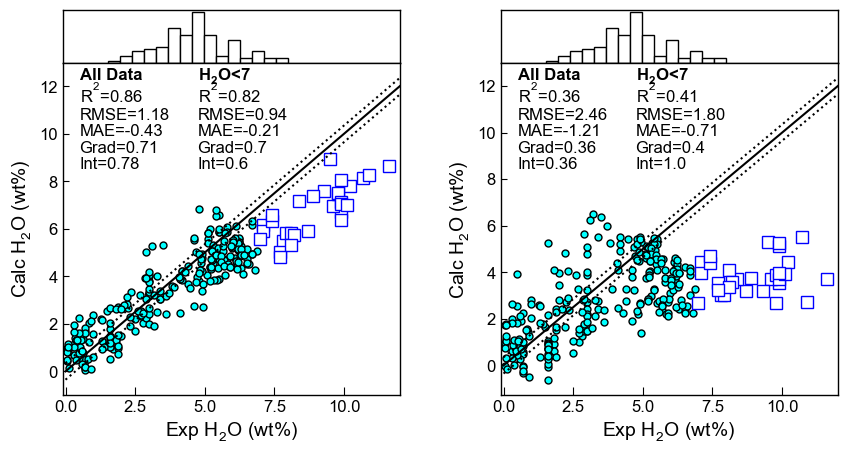

In [41]:
fig, (((ax3b),(ax3a)), ((ax1), (ax2))) = plt.subplots(2, 2, figsize=(10,5),gridspec_kw={'height_ratios': [0.8, 5]})
plt.subplots_adjust(wspace=0.3, hspace=0)
cut=0
# Plotting calibration dataset for Waters and Lang ontop of each plot
ax3b.hist(WL['H2O_Liq'].loc[WL['H2O_Liq']>cut], ec='k', fc='white', bins=15)
ax3a.hist(WL['H2O_Liq'].loc[WL['H2O_Liq']>cut], ec='k', fc='white', bins=15)

# Waters and Lang when you know the temperature. 
ax1.plot(xH.loc[Quantmethod], H2O_knownT['H2O_calc'].loc[Press_new&Quantmethod], 'ok', ms=5, mfc='cyan')
LowWater=Plag_Glass['H2O_Liq']<7
HighWater=~LowWater

ax1.plot(xH.loc[Quantmethod&HighWater], 
H2O_knownT['H2O_calc'].loc[Press_new&Quantmethod&HighWater],  
         'sb', mew=1, mfc='white', ms=8)

ax1.plot([0, 12], [0, 12], '-k')
ax1.plot([0, 12], [0+0.35, 12+0.35], ':k')
ax1.plot([0, 12], [0-0.35, 12-0.35], ':k')
Stats_KnownT=pt.calculate_R2(xH.loc[Quantmethod],
                      H2O_knownT['H2O_calc'].loc[Press_new&Quantmethod])
ax1.annotate('All Data',  xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate("R$^{2}$="+str(Stats_KnownT['R2']), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_KnownT['RMSE']), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_KnownT['Mean']), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_KnownT['Grad'], 2))[1:5], xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_KnownT['Int'], 2))[1:5], xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)

ax1.set_xlabel('Exp H$_2$O (wt%)')
ax1.set_ylabel('Calc H$_2$O (wt%)')
#ax1.set_title('Waters and Lange (2015)')
#ax1.set_title('Experimental Temp')

Stats_lowH=pt.calculate_R2(xH.loc[Quantmethod&LowWater], 
                            H2O_knownT['H2O_calc'].loc[Press_new&Quantmethod&LowWater])

ax1.annotate('H$_2$O<7',  xy=(0.4, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate("R$^{2}$="+str(Stats_lowH['R2']), xy=(0.4, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_lowH['RMSE']), xy=(0.4, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_lowH['Mean']), xy=(0.4, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_lowH['Grad'], 2))[1:4], xy=(0.4, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_lowH['Int'], 2))[1:4], xy=(0.4, 0.68),
xycoords="axes fraction", fontsize=12)

## Now, say we dont know T #####################333

ax2.plot(xH.loc[Quantmethod], 
Iter_TH_T['H2O_calc'].loc[Press_new&Quantmethod],  
         'ok', ms=5, mfc='cyan')

ax2.plot(xH.loc[Quantmethod&HighWater], 
Iter_TH_T['H2O_calc'].loc[Press_new&Quantmethod&HighWater],  
         'sb', mew=1,  mfc='white', ms=8)
ax2.plot([0, 12], [0, 12], '-k')
ax2.plot([0, 12], [0+0.35, 12+0.35], ':k')
ax2.plot([0, 12], [0-0.35, 12-0.35], ':k')
ax2.set_xlabel('Exp H$_2$O (wt%) ')
ax2.set_ylabel('Calc H$_2$O (wt%) ')
ax2.plot()

# Statistics for all iteration
Stats_IterT=pt.calculate_R2(xH.loc[Quantmethod], 
                            Iter_TH_T['H2O_calc'].loc[Press_new&Quantmethod])
ax2.annotate('All Data',  xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_IterT['R2']), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_IterT['RMSE']), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_IterT['Mean']), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_IterT['Grad'], 2))[1:5], xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_IterT['Grad'], 2))[1:5], xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)



# Restric to >1250K



Stats_Iter_lowWater=pt.calculate_R2(xH.loc[Quantmethod&LowWater], 
                            Iter_TH_T['H2O_calc'].loc[Press_new&Quantmethod&LowWater])

ax2.annotate('H$_2$O<7',  xy=(0.4, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_Iter_lowWater['R2']), xy=(0.4, 0.88),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_Iter_lowWater['RMSE']), xy=(0.4, 0.83),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_Iter_lowWater['Mean']), xy=(0.4, 0.78),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_Iter_lowWater['Grad'], 2))[1:4], xy=(0.4, 0.73),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_Iter_lowWater['Int'], 2))[1:4], xy=(0.4, 0.68),
xycoords="axes fraction", fontsize=12)



# lowT=~HighT
# Stats_lowT=pt.calculate_R2(xH.loc[Quantmethod&lowT], 
#                             Calc_T_H_24a['H2O_calc'].loc[Press_new&Quantmethod&lowT])

# ax2.annotate('T<1000°C',  xy=(0.35, 0.96),
# xycoords="axes fraction", fontsize=12, fontweight="bold")
# ax2.annotate("R$^{2}$="+str(Stats_lowT['R2']), xy=(0.35, 0.89),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("RMSE="+str(Stats_lowT['RMSE']), xy=(0.35, 0.85),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("Grad="+str(np.round(Stats_lowT['Grad'], 2))[1:4], xy=(0.35, 0.8),
# xycoords="axes fraction", fontsize=12)

ax3b.axes.get_yaxis().set_visible(False)
ax3b.axes.get_xaxis().set_visible(False)

ax3a.axes.get_yaxis().set_visible(False)
ax3a.axes.get_xaxis().set_visible(False)

ax3b.set_xlim([-0.1, 12])
ax3a.set_xlim([-0.1, 12])
ax1.set_xlim([-0.1, 12])
ax2.set_xlim([-0.1, 12])

fig.savefig('Water_Statistics_PlagLiq_solQuant_June23.png', dpi=200)

In [37]:
Putirka_Cali=pd.read_excel('Putirka_Plag_Liq_Cali.xlsx')

In [38]:
T_knownH2O=pt.calculate_fspar_liq_temp(liq_comps=myLiquids1, plag_comps=myPlags1, 
        H2O_Liq=Plag_Glass['H2O_Liq'], equationT="T_Put2008_eq24a", P=Plag_Glass['P_kbar_x'], eq_tests=True)


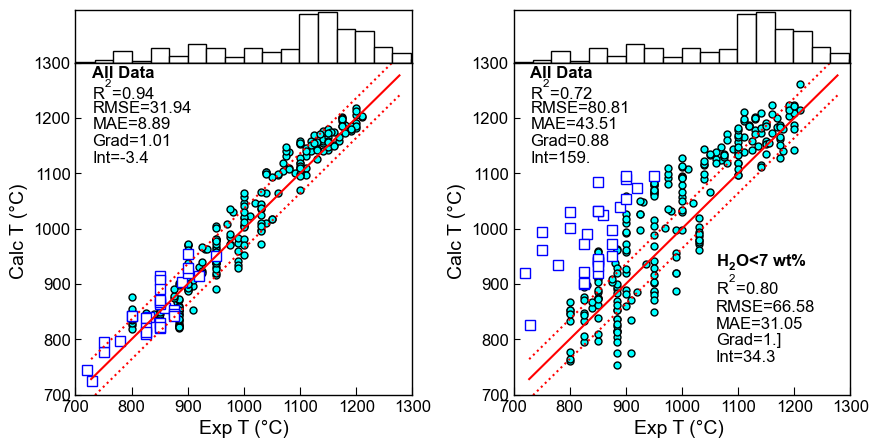

In [42]:
fig, (((ax3b),(ax3a)), ((ax1), (ax2))) = plt.subplots(2, 2, figsize=(10,5),
                                     gridspec_kw={'height_ratios': [0.8, 5]})
plt.subplots_adjust(wspace=0.3, hspace=0)
cut=0
ax3b.hist(Putirka_Cali['T (C)'].loc[Putirka_Cali['T (C)']>cut], ec='k', fc='white', bins=40)
ax3a.hist(Putirka_Cali['T (C)'].loc[Putirka_Cali['T (C)']>cut], ec='k', fc='white', bins=40)


ax1.plot(xT.loc[Quantmethod]-273.15, 
         T_knownH2O['T_K_calc'].loc[Press_new&Quantmethod]-273.15, 
         'ok', ms=5, mfc='cyan')

ax1.plot(xT.loc[Quantmethod&HighWater]-273.15, 
T_knownH2O['T_K_calc'].loc[Press_new&Quantmethod&HighWater]-273.15,  
         'sb', mew=1, ms=7, mfc='white')

ax1.plot([1001-273.15, 1550-273.15], [1001-273.15, 1550-273.15], '-r')
ax1.plot([1001-273.15, 1550-273.15], [1001-273.15+36, 1550-273.15+36], ':r')
ax1.plot([1001-273.15, 1550-273.15], [1001-273.15-36, 1550-273.15-36], ':r')

Stats_KnownT=pt.calculate_R2(xT.loc[Quantmethod]-273.15,
                      T_knownH2O['T_K_calc'].loc[Press_new&Quantmethod]-273.15)

ax1.annotate("R$^{2}$="+str(Stats_KnownT['R2']), xy=(0.05, 0.89),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_KnownT['RMSE']), xy=(0.05, 0.85),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_KnownT['Mean']), xy=(0.05, 0.80),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_KnownT['Grad'], 2))[1:5], xy=(0.05, 0.75),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_KnownT['Int'], 2))[1:5], xy=(0.05, 0.70),
xycoords="axes fraction", fontsize=12)

#ax1.set_title('Waters and Lange (2015)')
#ax1.set_title('Experimental Temp')

ax2.plot(xT.loc[Quantmethod]-273.15, 
Iter_TH_T['T_K_calc'].loc[Press_new&Quantmethod]-273.15,  
         'ok', ms=5, mfc='cyan')

# HighT=Plag_Glass['H2O_Liq']<7.5
# ax2.plot(xT.loc[Quantmethod&HighT]-273.15, 
# Calc_T_H_24a['T_K_calc'].loc[Press_new&Quantmethod&HighT]-273.15,
#          'ok', ms=5, mfc='black')

ax2.plot(xT.loc[Quantmethod&HighWater]-273.15, 
Iter_TH_T['T_K_calc'].loc[Press_new&Quantmethod&HighWater]-273.15,  
         'sb', mew=1, ms=7, mfc='white')


ax2.plot([1001-273.15, 1550-273.15], [1001-273.15, 1550-273.15], '-r')
ax2.plot([1001-273.15, 1550-273.15], [1001-273.15+36, 1550-273.15+36], ':r')
ax2.plot([1001-273.15, 1550-273.15], [1001-273.15-36, 1550-273.15-36], ':r')

ax2.plot()

Stats_IterT=pt.calculate_R2(xT.loc[Quantmethod]-273.15, 
Iter_TH_T['T_K_calc'].loc[Press_new&Quantmethod]-273.15)
# ax2.annotate('All Data',  xy=(0.05, 0.96),
# xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate('All Data',  xy=(0.05, 0.955),
xycoords="axes fraction", fontsize=12, fontweight="bold")

ax2.annotate('All Data',  xy=(0.05, 0.955),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_IterT['R2']), xy=(0.05, 0.89),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_IterT['RMSE']), xy=(0.05, 0.85),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_IterT['Mean']), xy=(0.05, 0.80),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_IterT['Grad'], 4))[1:5], xy=(0.05, 0.75),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_IterT['Int'], 4))[1:5], xy=(0.05, 0.70),
xycoords="axes fraction", fontsize=12)

## High water cut off

HighWater=Plag_Glass['H2O_Liq']>7



## Restric to >1250K



Stats_HighT=pt.calculate_R2(xT.loc[Quantmethod&LowWater]-273.15, 
Iter_TH_T['T_K_calc'].loc[Press_new&Quantmethod&LowWater]-273.15)

ax2.annotate('H$_2O$<7 wt%',  xy=(0.6, 0.39),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_HighT['R2']), xy=(0.6, 0.3),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_HighT['RMSE']), xy=(0.6, 0.25),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_HighT['Mean']), xy=(0.6, 0.20),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_HighT['Grad'], 2))[1:5], xy=(0.6, 0.15),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_HighT['Int'], 2))[1:5], xy=(0.6, 0.1),
xycoords="axes fraction", fontsize=12)


ax3b.axes.get_yaxis().set_visible(False)
ax3b.axes.get_xaxis().set_visible(False)

ax3a.axes.get_yaxis().set_visible(False)
ax3a.axes.get_xaxis().set_visible(False)

ax1.set_xlim([700, 1300])
ax1.set_ylim([700, 1300])
ax2.set_xlim([700, 1300])
ax2.set_ylim([700, 1300])

ax3a.set_xlim([700, 1300])
ax3b.set_xlim([700, 1300])


ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) ')
ax2.set_xlabel('Exp T (°C) ')
ax2.set_ylabel('Calc T (°C) ')

fig.savefig('Putirka24a_TempTest_SolQuant_June23.png', dpi=200)